#### Pridicting Heart Disease by using Machine Learning Algorithm.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Use any two Machine Learning algorithm to perform same
**preferable ML models**
- Naive Bayes
- Dicision Tree
- Random forest
5. Use model evaluation matrices to discuss the accuracy
- Accuracy
- Confusion Matrix
- ROC Score
- Recall
- Precision
- F1 score


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [1]:
# importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

there is no null value in the dataset 

In [8]:
# Renaming Columns for better Univariate Analysis of Data

df['sex'] = df['sex'].replace({1: 'Male', 0: 'Female'})
df['fbs'] = df['fbs'].replace({1: 'True', 0: 'False'})
df['exang'] = df['exang'].replace({1: 'Yes', 0: 'No'})
df = df.rename(columns={'cp': 'Chest Pain Type'})
df = df.rename(columns={'trestbps': 'Resting Blood Pressure'})
df = df.rename(columns={'chol': 'Serum Cholestoral'})
df = df.rename(columns={'fbs': 'Fasting Blood Sugar'})
df = df.rename(columns={'trestbps': 'Resting Blood Pressure'})
df = df.rename(columns={'restecg': 'Resting Electrocardiographic'})
df = df.rename(columns={'thalach': 'Maximum Heart Rate Achieved'})
df = df.rename(columns={'exang':'Exercise Induced Angina'})

In [9]:
# defining colours
colors = sns.color_palette("Set2")
colors

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [10]:
def numerical_plots(column_name):
    plt.figure(figsize=(6, 4))
    plt.title(f'Plots for column {column_name}')
    
    # Histogram
    sns.histplot(df, x=column_name, color=colors[1])
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    plt.show()

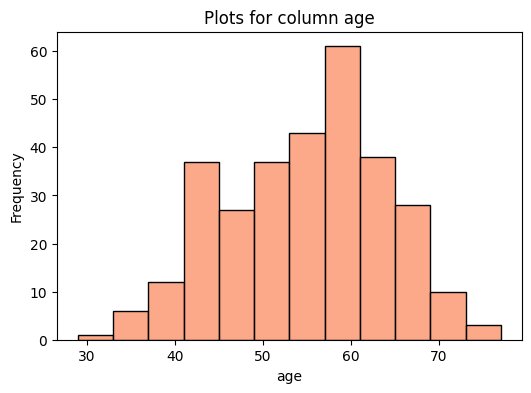

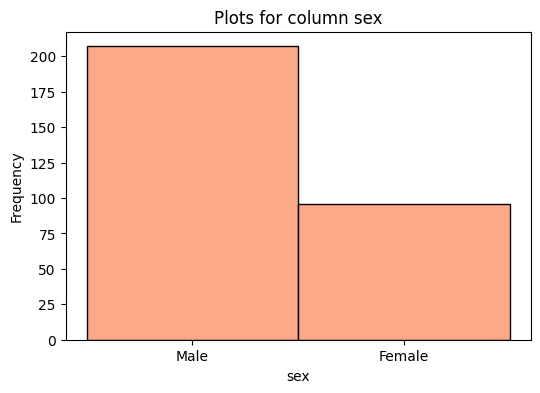

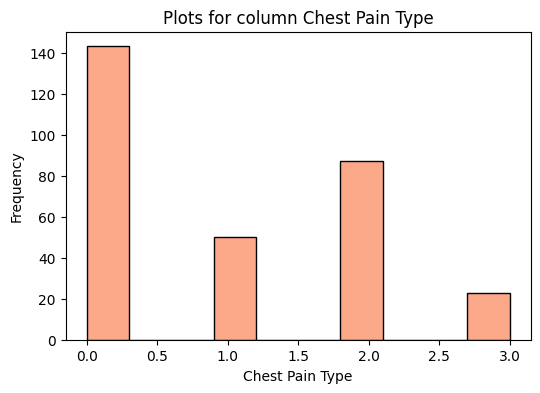

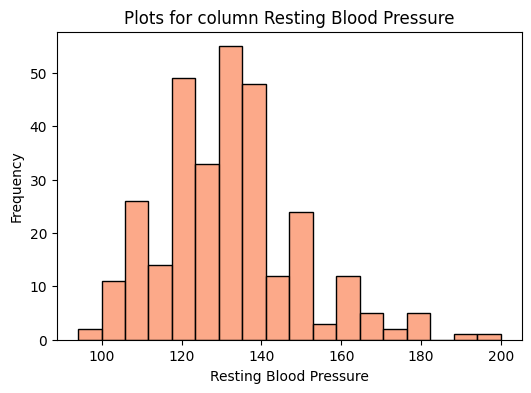

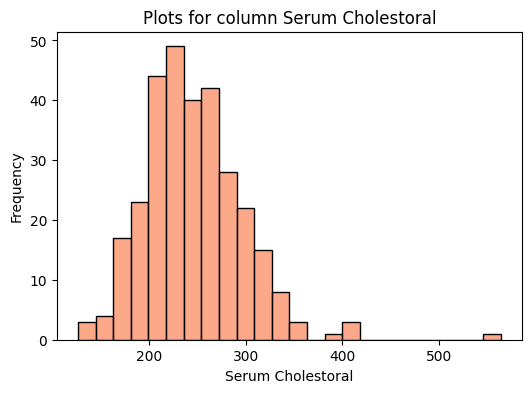

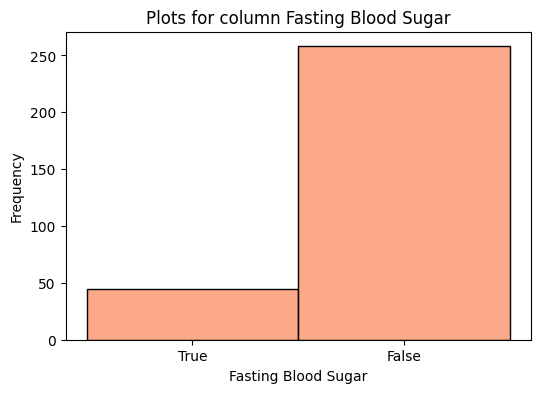

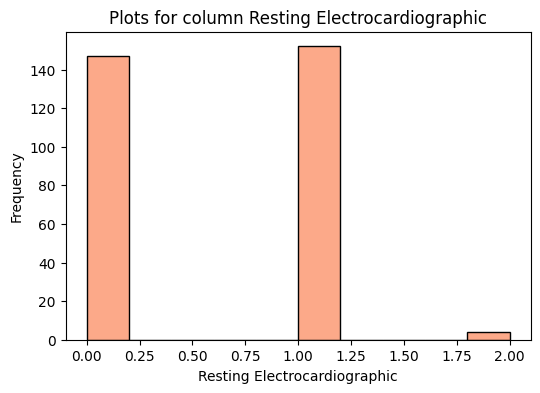

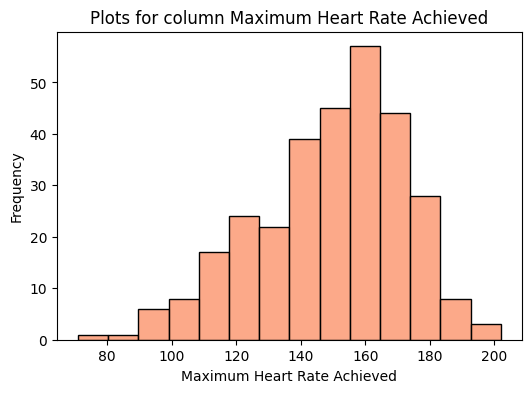

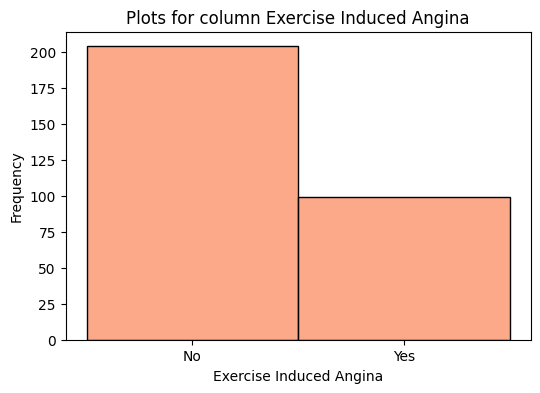

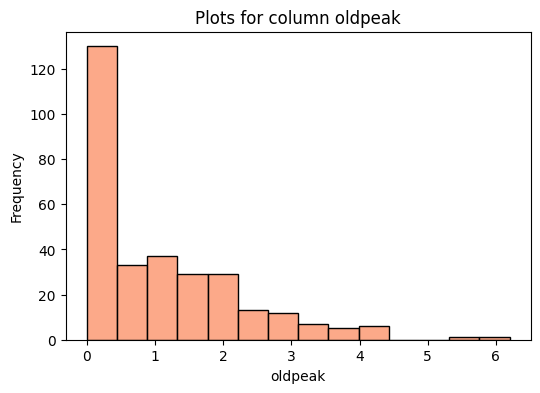

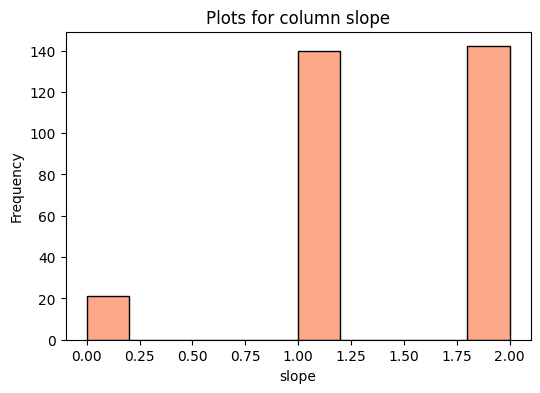

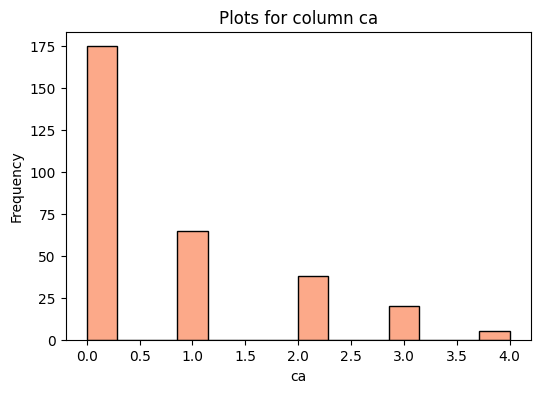

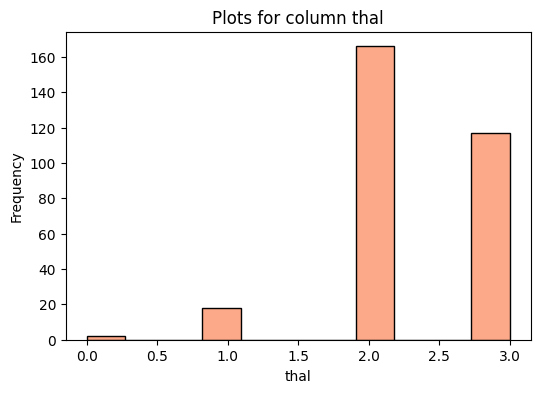

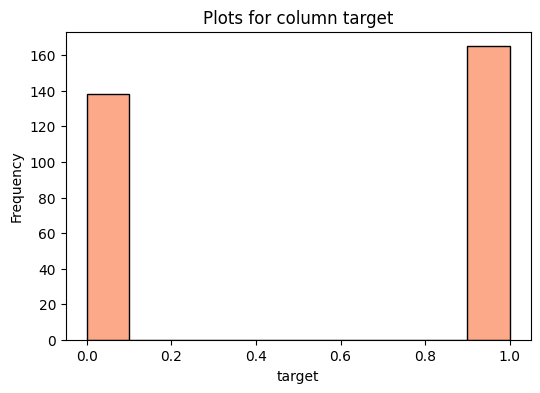

In [11]:
# Plotting histogram for all columns
for i in df.columns:
    numerical_plots(i)

In [12]:
def box_plots(column_name):
    plt.figure(figsize=(6, 4))
    plt.title(f'Plots for column {column_name}')
    
    # BoxPlot
    sns.boxplot(df, x=column_name, color=colors[1])
    plt.xlabel(column_name)

    plt.show()

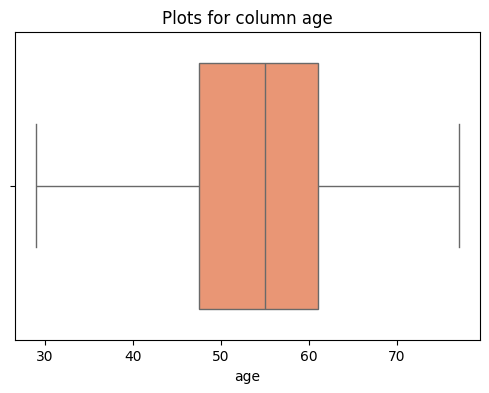

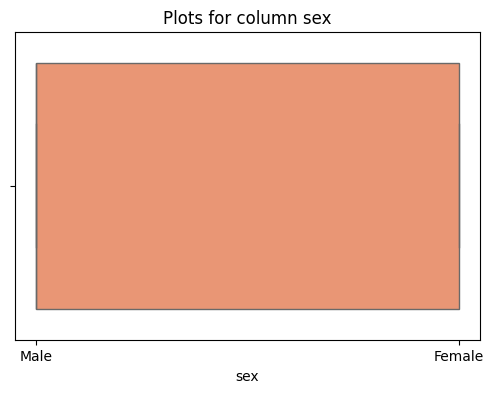

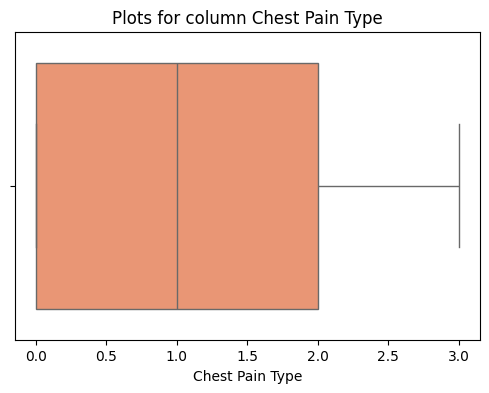

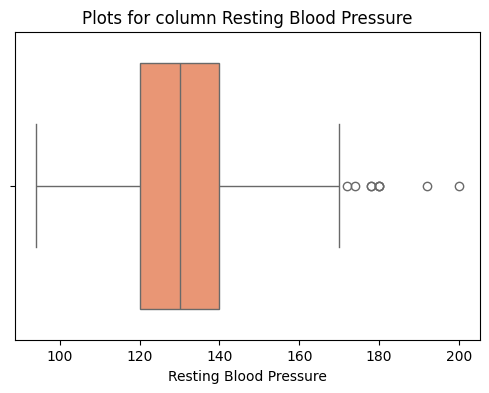

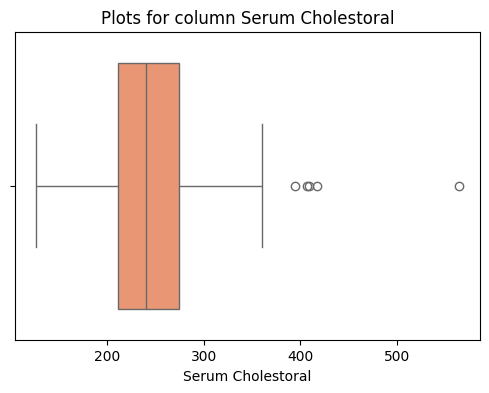

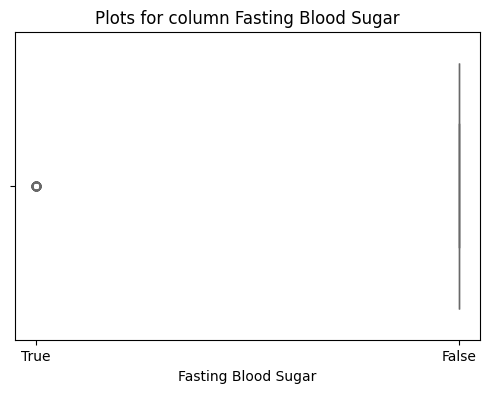

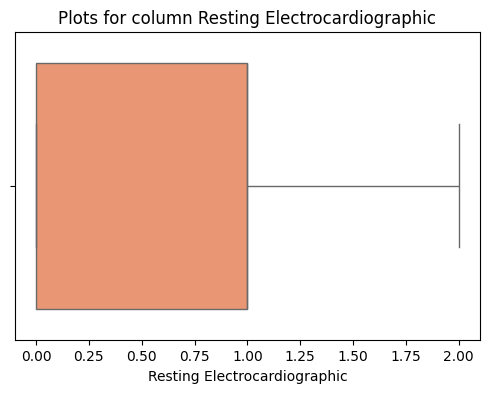

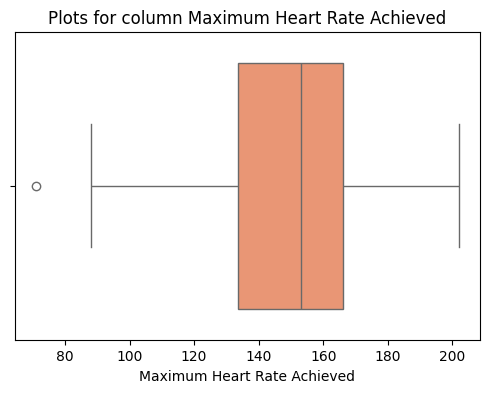

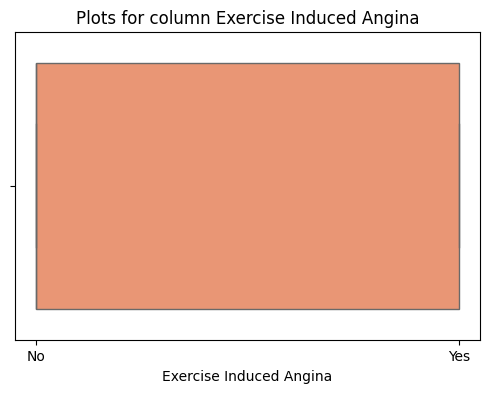

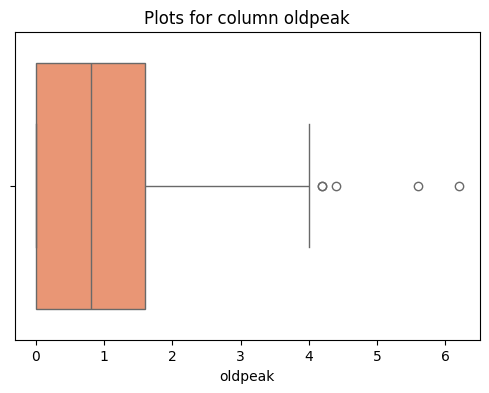

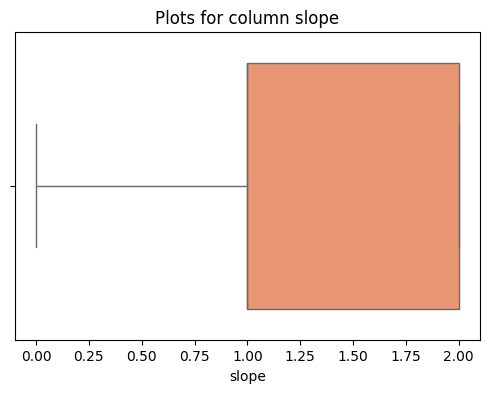

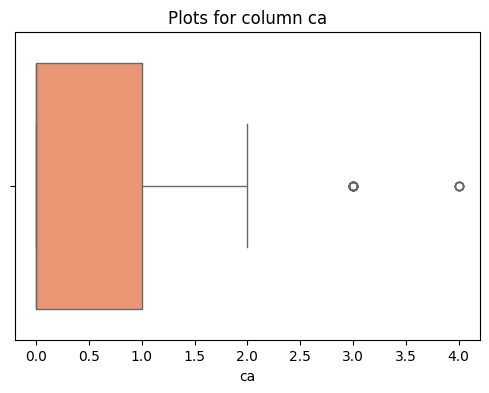

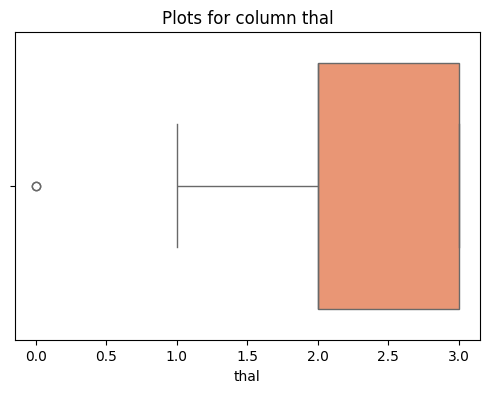

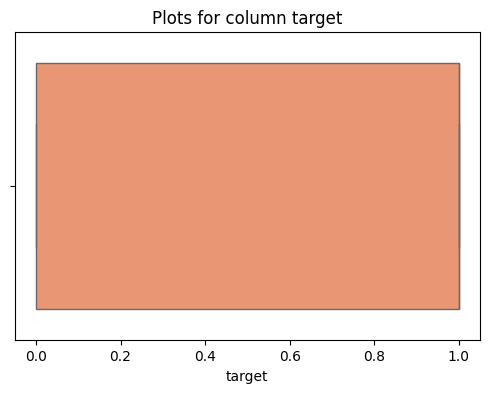

In [13]:
# Plotting boxplot for all columns
for i in df.columns:
    box_plots(i)

In [14]:
df = pd.read_csv('heart.csv')

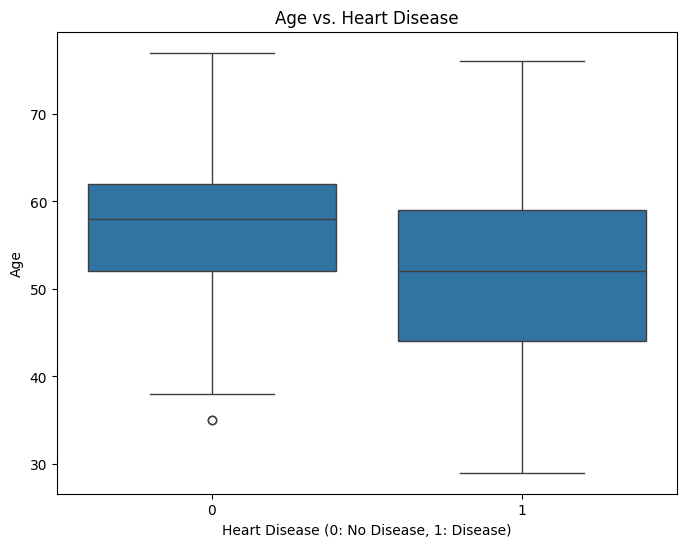

In [15]:
# Bivariate Analysis for 'age' vs. 'target' (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs. Heart Disease')
plt.xlabel('Heart Disease (0: No Disease, 1: Disease)')
plt.ylabel('Age')
plt.show()

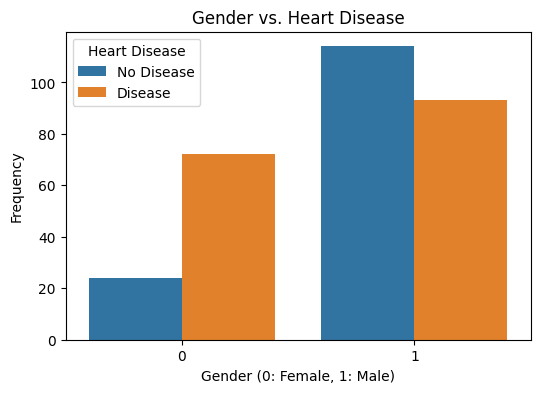

In [16]:
# Bivariate Analysis for 'sex' vs. 'target' (Count plot)
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Gender vs. Heart Disease')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

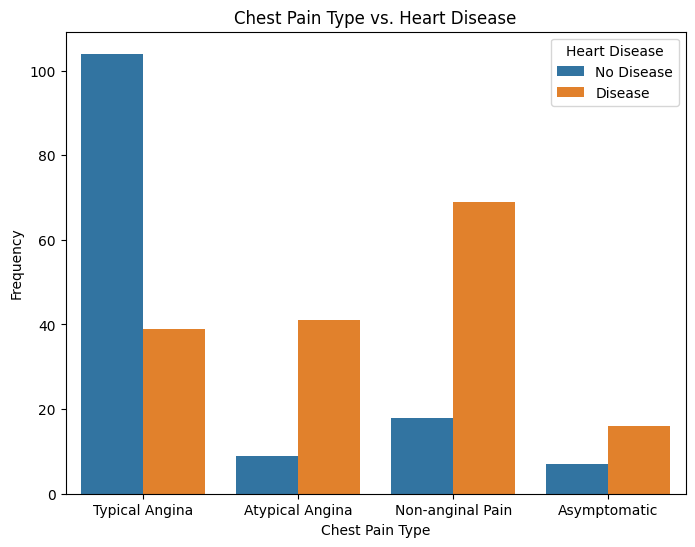

In [17]:
# Bivariate Analysis for 'cp' (Chest Pain Type) vs. 'target' (Count plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

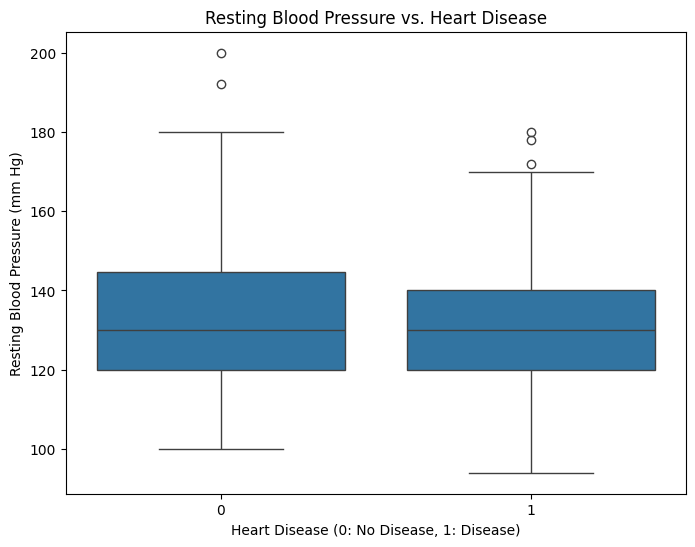

In [18]:
# Bivariate Analysis for 'trestbps' (Resting Blood Pressure) vs. 'target' (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure vs. Heart Disease')
plt.xlabel('Heart Disease (0: No Disease, 1: Disease)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

Text(0, 0.5, 'Serum Cholesterol (mg/dl)')

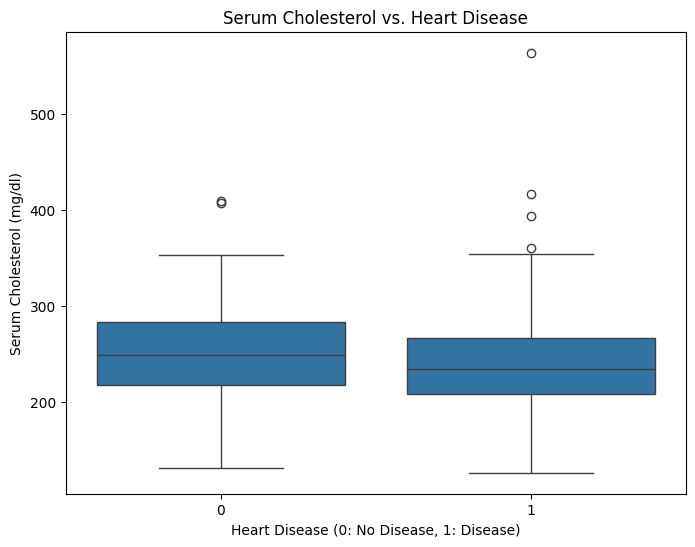

In [19]:
# Bivariate Analysis for 'chol' (Serum Cholesterol) vs. 'target' (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Serum Cholesterol vs. Heart Disease')
plt.xlabel('Heart Disease (0: No Disease, 1: Disease)')
plt.ylabel('Serum Cholesterol (mg/dl)')

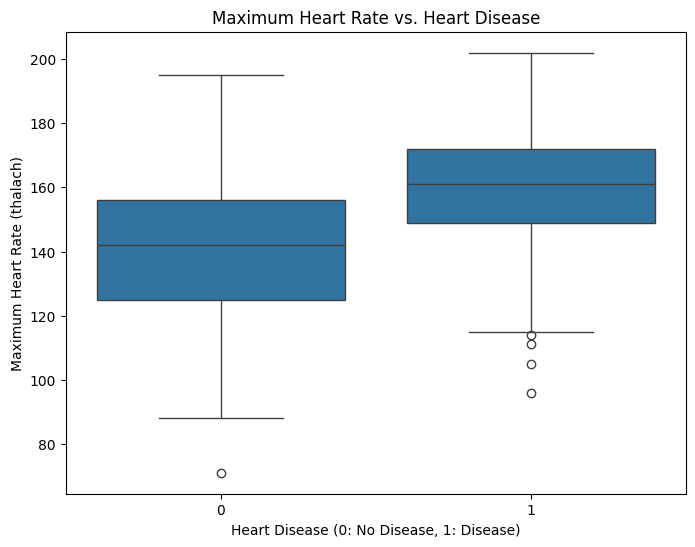

In [20]:
# Bivariate Analysis for 'thalach' (Maximum Heart Rate) vs. 'target' (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Maximum Heart Rate vs. Heart Disease')
plt.xlabel('Heart Disease (0: No Disease, 1: Disease)')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()

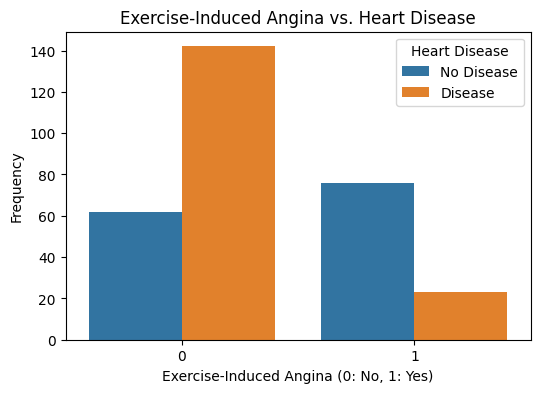

In [21]:
# Bivariate Analysis for 'exang' (Exercise-Induced Angina) vs. 'target' (Count plot)
plt.figure(figsize=(6, 4))
sns.countplot(x='exang', hue='target', data=df)
plt.title('Exercise-Induced Angina vs. Heart Disease')
plt.xlabel('Exercise-Induced Angina (0: No, 1: Yes)')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

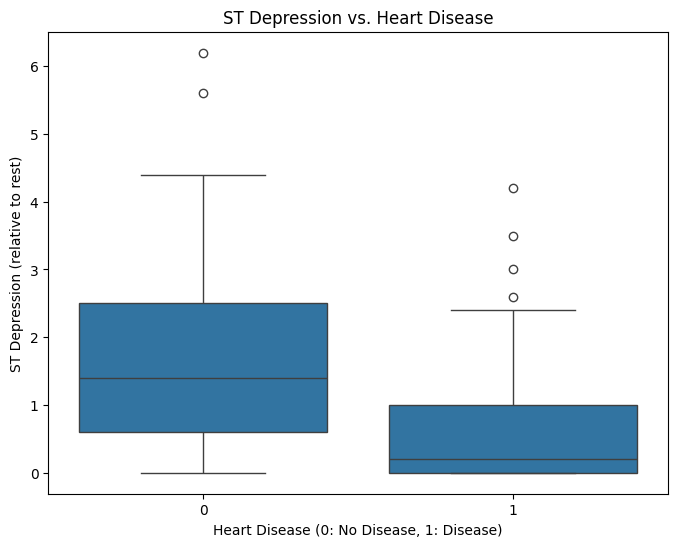

In [22]:
# Bivariate Analysis for 'oldpeak' (ST Depression) vs. 'target' (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title('ST Depression vs. Heart Disease')
plt.xlabel('Heart Disease (0: No Disease, 1: Disease)')
plt.ylabel('ST Depression (relative to rest)')
plt.show()

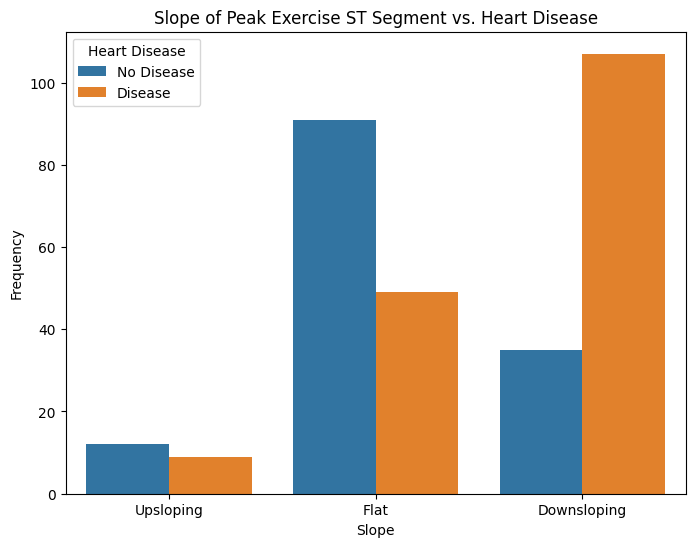

In [23]:
# Bivariate Analysis for 'slope' (Slope of Peak Exercise ST Segment) vs. 'target' (Count plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='slope', hue='target', data=df)
plt.title('Slope of Peak Exercise ST Segment vs. Heart Disease')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Upsloping', 'Flat', 'Downsloping'])
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

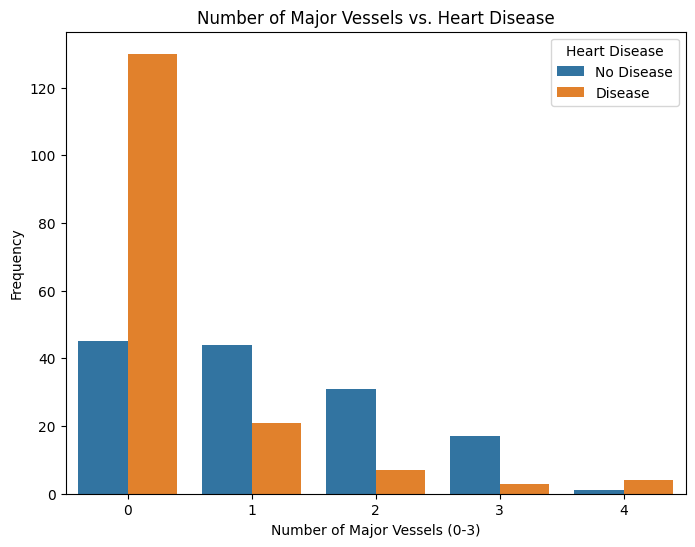

In [24]:
# Bivariate Analysis for 'ca' (Number of Major Vessels) vs. 'target' (Count plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='ca', hue='target', data=df)
plt.title('Number of Major Vessels vs. Heart Disease')
plt.xlabel('Number of Major Vessels (0-3)')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

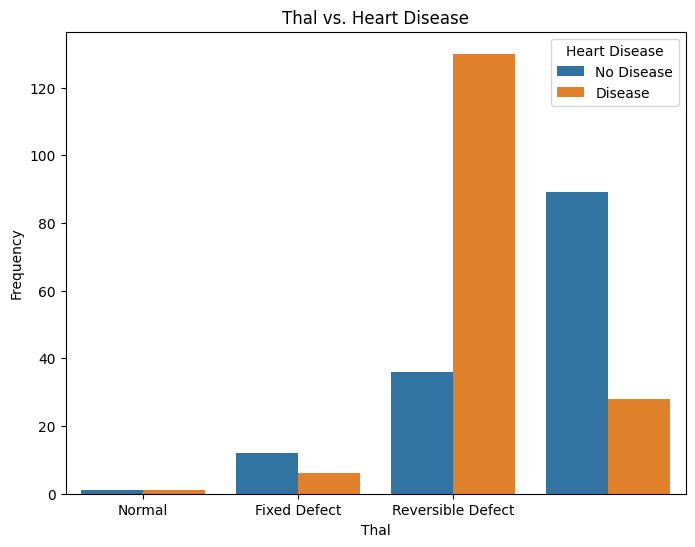

In [25]:
# Bivariate Analysis for 'thal' vs. 'target' (Count plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='thal', hue='target', data=df)
plt.title('Thal vs. Heart Disease')
plt.xlabel('Thal')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Normal', 'Fixed Defect', 'Reversible Defect'])
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

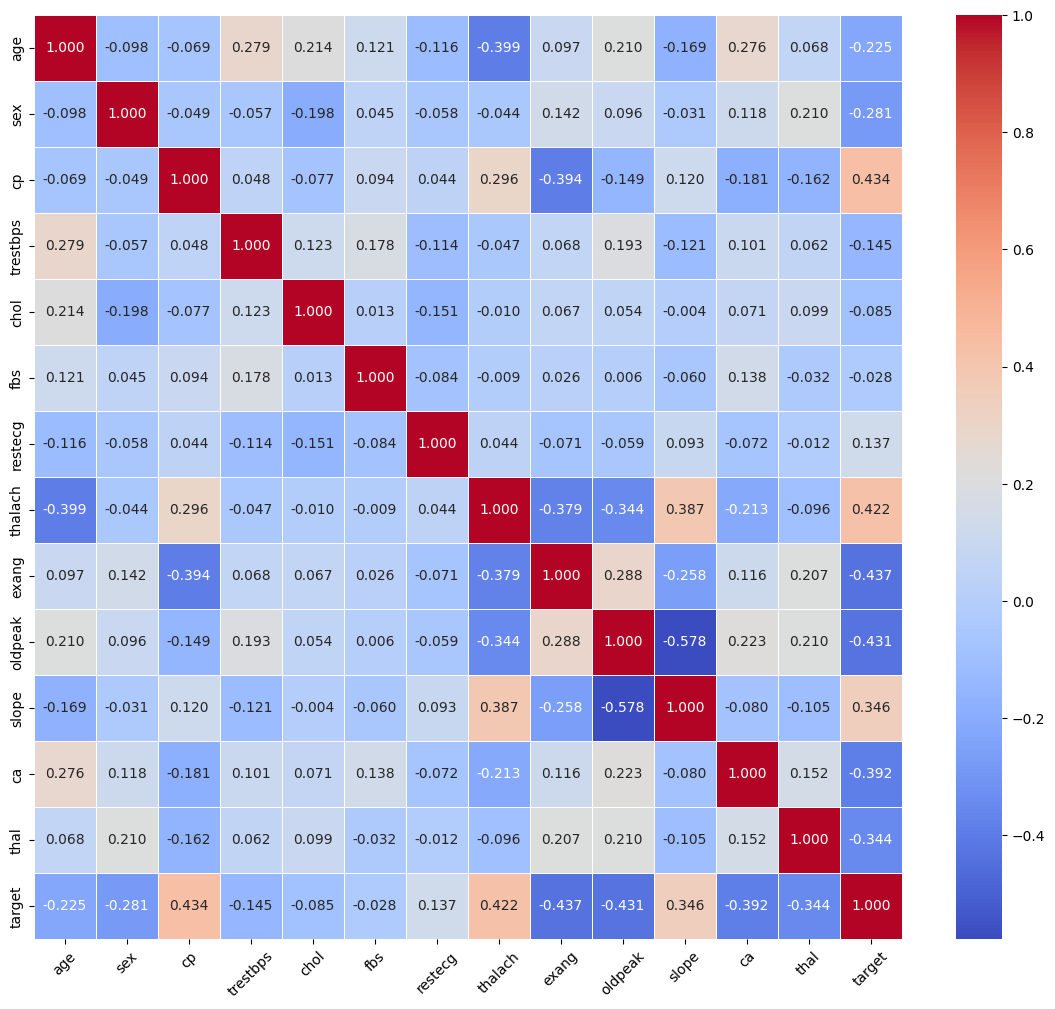

In [26]:
# Plot the correlation matrix as a heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".3f", linewidths=0.5)
plt.xticks(rotation=45)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score

In [28]:
# Split data into features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# 5. Model Evaluation Matrices
# Predictions
nb_pred = nb_classifier.predict(X_test)
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)

# Accuracy
nb_accuracy = accuracy_score(y_test, nb_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("\nAccuracy Scores:")
print("Naive Bayes:", nb_accuracy)
print("Decision Tree:", dt_accuracy)
print("Random Forest:", rf_accuracy)

# Confusion matrix
nb_cm = confusion_matrix(y_test, nb_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
print("\nConfusion Matrix for Naive Bayes:")
print(nb_cm)
print("\nConfusion Matrix for Decision Tree:")
print(dt_cm)
print("\nConfusion Matrix for Random Forest:")
print(rf_cm)

# ROC Score
nb_roc_score = roc_auc_score(y_test, nb_pred)
dt_roc_score = roc_auc_score(y_test, dt_pred)
rf_roc_score = roc_auc_score(y_test, rf_pred)
print("\nROC Scores:")
print("Naive Bayes:", nb_roc_score)
print("Decision Tree:", dt_roc_score)
print("Random Forest:", rf_roc_score)

# Recall
nb_recall = recall_score(y_test, nb_pred)
dt_recall = recall_score(y_test, dt_pred)
rf_recall = recall_score(y_test, rf_pred)
print("\nRecall Scores:")
print("Naive Bayes:", nb_recall)
print("Decision Tree:", dt_recall)
print("Random Forest:", rf_recall)

# Precision
nb_precision = precision_score(y_test, nb_pred)
dt_precision = precision_score(y_test, dt_pred)
rf_precision = precision_score(y_test, rf_pred)
print("\nPrecision Scores:")
print("Naive Bayes:", nb_precision)
print("Decision Tree:", dt_precision)
print("Random Forest:", rf_precision)

# F1 Score
nb_f1_score = f1_score(y_test, nb_pred)
dt_f1_score = f1_score(y_test, dt_pred)
rf_f1_score = f1_score(y_test, rf_pred)
print("\nF1 Scores:")
print("Naive Bayes:", nb_f1_score)
print("Decision Tree:", dt_f1_score)
print("Random Forest:", rf_f1_score)



Accuracy Scores:
Naive Bayes: 0.8688524590163934
Decision Tree: 0.7540983606557377
Random Forest: 0.8360655737704918

Confusion Matrix for Naive Bayes:
[[26  3]
 [ 5 27]]

Confusion Matrix for Decision Tree:
[[25  4]
 [11 21]]

Confusion Matrix for Random Forest:
[[24  5]
 [ 5 27]]

ROC Scores:
Naive Bayes: 0.8701508620689655
Decision Tree: 0.7591594827586207
Random Forest: 0.8356681034482758

Recall Scores:
Naive Bayes: 0.84375
Decision Tree: 0.65625
Random Forest: 0.84375

Precision Scores:
Naive Bayes: 0.9
Decision Tree: 0.84
Random Forest: 0.84375

F1 Scores:
Naive Bayes: 0.8709677419354839
Decision Tree: 0.7368421052631579
Random Forest: 0.84375
